<div style="background-color:#0097a7; padding:20px; border-radius:10px; text-align:center;">
  <h1 style="color:white; font-family:Comic Sans MS;">Hotel Booking Cancellation EDA <br> and Prediction</h1>
</div>

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="Screenshot_3.png" alt="Image 1" width="550">
  <img src="Screenshot_4.png" alt="Image 2" width="550">
</div>


<div style="background-color:orange; padding:15px; border-radius:10px; text-align:center;">
  <h2 style="color:navy; font-family:Comic Sans MS;">Table of Contents</h2>
</div>

# <b> EDA

# <b> From where the most guests are coming ?<Br>
# <b> How much do guests pay for a room per night?<Br>
# <b> How does the price vary per night over the year?<Br>
# <b> Which are the most busy months?<Br>
# <b> How long do people stay at the hotels?<Br>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import PolynomialFeatures,StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import ipywidgets as widgets
from ipywidgets import interact,interact_manual,interactive,fixed

import csv,sqlalchemy,sqlite3
import prettytable
prettytable.DEAFULT='DEAFULT'

import folium
from folium.plugins import HeatMap
import plotly.express as px

In [4]:
df=pd.read_csv('c:/Users/NASIM/Downloads/hotel_bookings.csv')

In [5]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe(include='all')

hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13877                       NaN   
mean                  NaN                 27.165173   
std                   NaN                 13.605138   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119390.000000            119390.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798241                 0.927599   
std                      8.780829                 0.998613   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults  ...  deposit_type          agent  \
count          119390.000000  119390.000000  ...        119390  103050.000000   
unique                   NaN            NaN  ...             3            NaN   
top                      NaN            NaN  ...    No Deposit            NaN   
freq                     NaN            NaN  ...        104641            NaN   
mean                2.500302       1.856403  ...           NaN      86.693382   
std                 1.908286       0.579261  ...           NaN     110.774548   
min                 0.000000       0.000000  ...           NaN       1.000000   
25%                 1.000000       2.000000  ...           NaN       9.000000   
50%                 2.000000       2.000000  ...           NaN      14.000000   
75%                 3.000000       2.000000  ...           NaN     229.000000   
max                50.000000      55.000000  ...           NaN     535.000000   

            company days_in_waiting_list customer_type            adr  \
count   6797.000000        119390.000000        119390  119390.000000   
unique          NaN                  NaN             4            NaN   
top             NaN                  NaN     Transient            NaN   
freq            NaN                  NaN         89613            NaN   
mean     189.266735             2.321149           NaN     101.831122   
std      131.655015            17.594721           NaN      50.535790   
min        6.000000             0.000000           NaN      -6.380000   
25%       62.000000             0.000000           NaN      69.290000   
50%      179.000000             0.000000           NaN      94.575000   
75%      270.000000             0.000000           

# <b> Checking for null valuse

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df['is_canceled'].isnull().value_counts()

is_canceled
False    119390
Name: count, dtype: int64

In [7]:
m=df.isnull()
n=m.columns.tolist()

for i in n: 
    print(m[i].value_counts())
    print()

hotel
False    119390
Name: count, dtype: int64

is_canceled
False    119390
Name: count, dtype: int64

lead_time
False    119390
Name: count, dtype: int64

arrival_date_year
False    119390
Name: count, dtype: int64

arrival_date_month
False    119390
Name: count, dtype: int64

arrival_date_week_number
False    119390
Name: count, dtype: int64

arrival_date_day_of_month
False    119390
Name: count, dtype: int64

stays_in_weekend_nights
False    119390
Name: count, dtype: int64

stays_in_week_nights
False    119390
Name: count, dtype: int64

adults
False    119390
Name: count, dtype: int64

children
False    119386
True          4
Name: count, dtype: int64

babies
False    119390
Name: count, dtype: int64

meal
False    119390
Name: count, dtype: int64

country
False    118902
True        488
Name: count, dtype: int64

market_segment
False    119390
Name: count, dtype: int64

distribution_channel
False    119390
Name: count, dtype: int64

is_repeated_guest
False    119390
Name: count, 

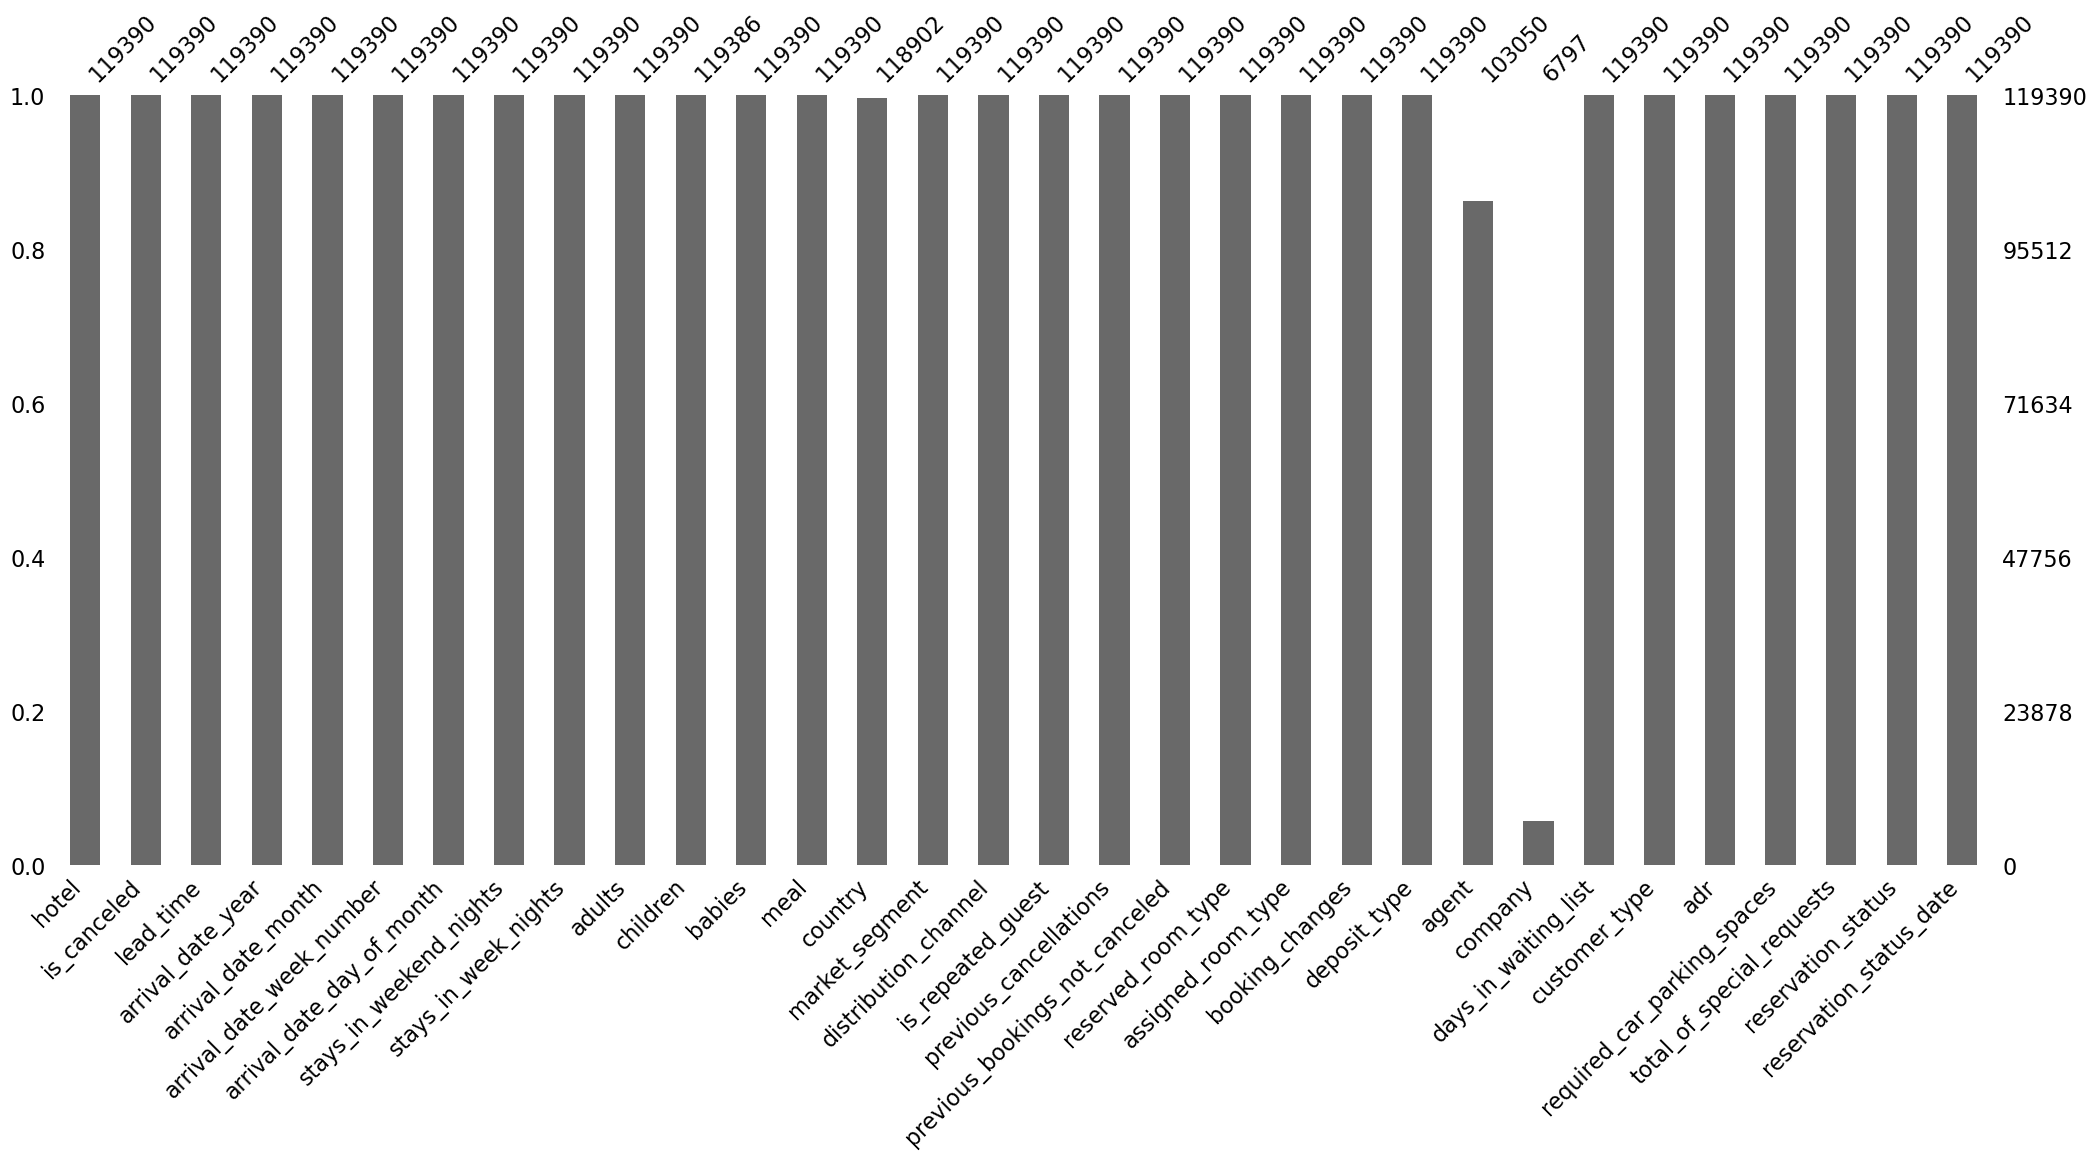

In [8]:
#visualizing null slove
msno.bar(df)
plt.show()

In [19]:
null=pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage Null Values':(df.isnull().sum()/df.shape[0] *(100))}) 
null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

In [16]:
df.fillna(0,inplace=True)

In [17]:
slove_null=pd.DataFrame({'SLOVE AFTER NULL VALUES':df.isna().sum(),'SLOVE AFTER NULL PERCENTAGE':(df.isna().sum()/df.shape[0] *(100))}) 
slove_null

SLOVE AFTER NULL VALUES  \
hotel                                                 0   
is_canceled                                           0   
lead_time                                             0   
arrival_date_year                                     0   
arrival_date_month                                    0   
arrival_date_week_number                              0   
arrival_date_day_of_month                             0   
stays_in_weekend_nights                               0   
stays_in_week_nights                                  0   
adults                                                0   
children                                              0   
babies                                                0   
meal                                                  0   
country                                               0   
market_segment                                        0   
distribution_channel                                  0   
is_repeated_guest                                     0   
previous_cancellations                                0   
previous_bookings_not_canceled                        0   
reserved_room_type                                    0   
assigned_room_type                                    0   
booking_changes                                       0   
deposit_type                                          0   
agent                                                 0   
company                                               0   
days_in_waiting_list                                  0   
customer_type                                         0   
adr                                                   0   
required_car_parking_spaces                           0   
total_of_special_requests                             0   
reservation_status                                    0   
reservation_status_date                               0   

                                SLOVE AFTER NULL PERCENTAGE  
hotel                                                   0.0  
is_canceled                                             0.0  
lead_time                                               0.0  
arrival_date_year                                       0.0  
arrival_date_month                                      0.0  
arrival_date_week_number                                0.0  
arrival_date_day_of_month                               0.0  
stays_in_weekend_nights                                 0.0  
stays_in_week_nights                                    0.0  
adults                                                  0.0  
children                                                0.0  
babies                                                  0.0  
meal                                                    0.0  
country                                                 0.0  
market_segment                                          0.0  
distribution_channel                                    0.0  
is_repeated_guest                                       0.0  
previous_cancellations                                  0.0  
previous_bookings_not_canceled                          0.0  
reserved_room_type                                      0.0  
assigned_room_type                                      0.0  
booking_changes                                         0.0  
deposit_type                                            0.0  
agent                                                   0.0  
company                                                 0.0  
days_in_waiting_list                                    0.0  
customer_type                                           0.0  
adr                                                     0.0  
required_car_parking_spaces                             0.0  
total_of_special_requests                               0.0  
reservation_status                                      0.0  
reservation_status_date                                 0.0

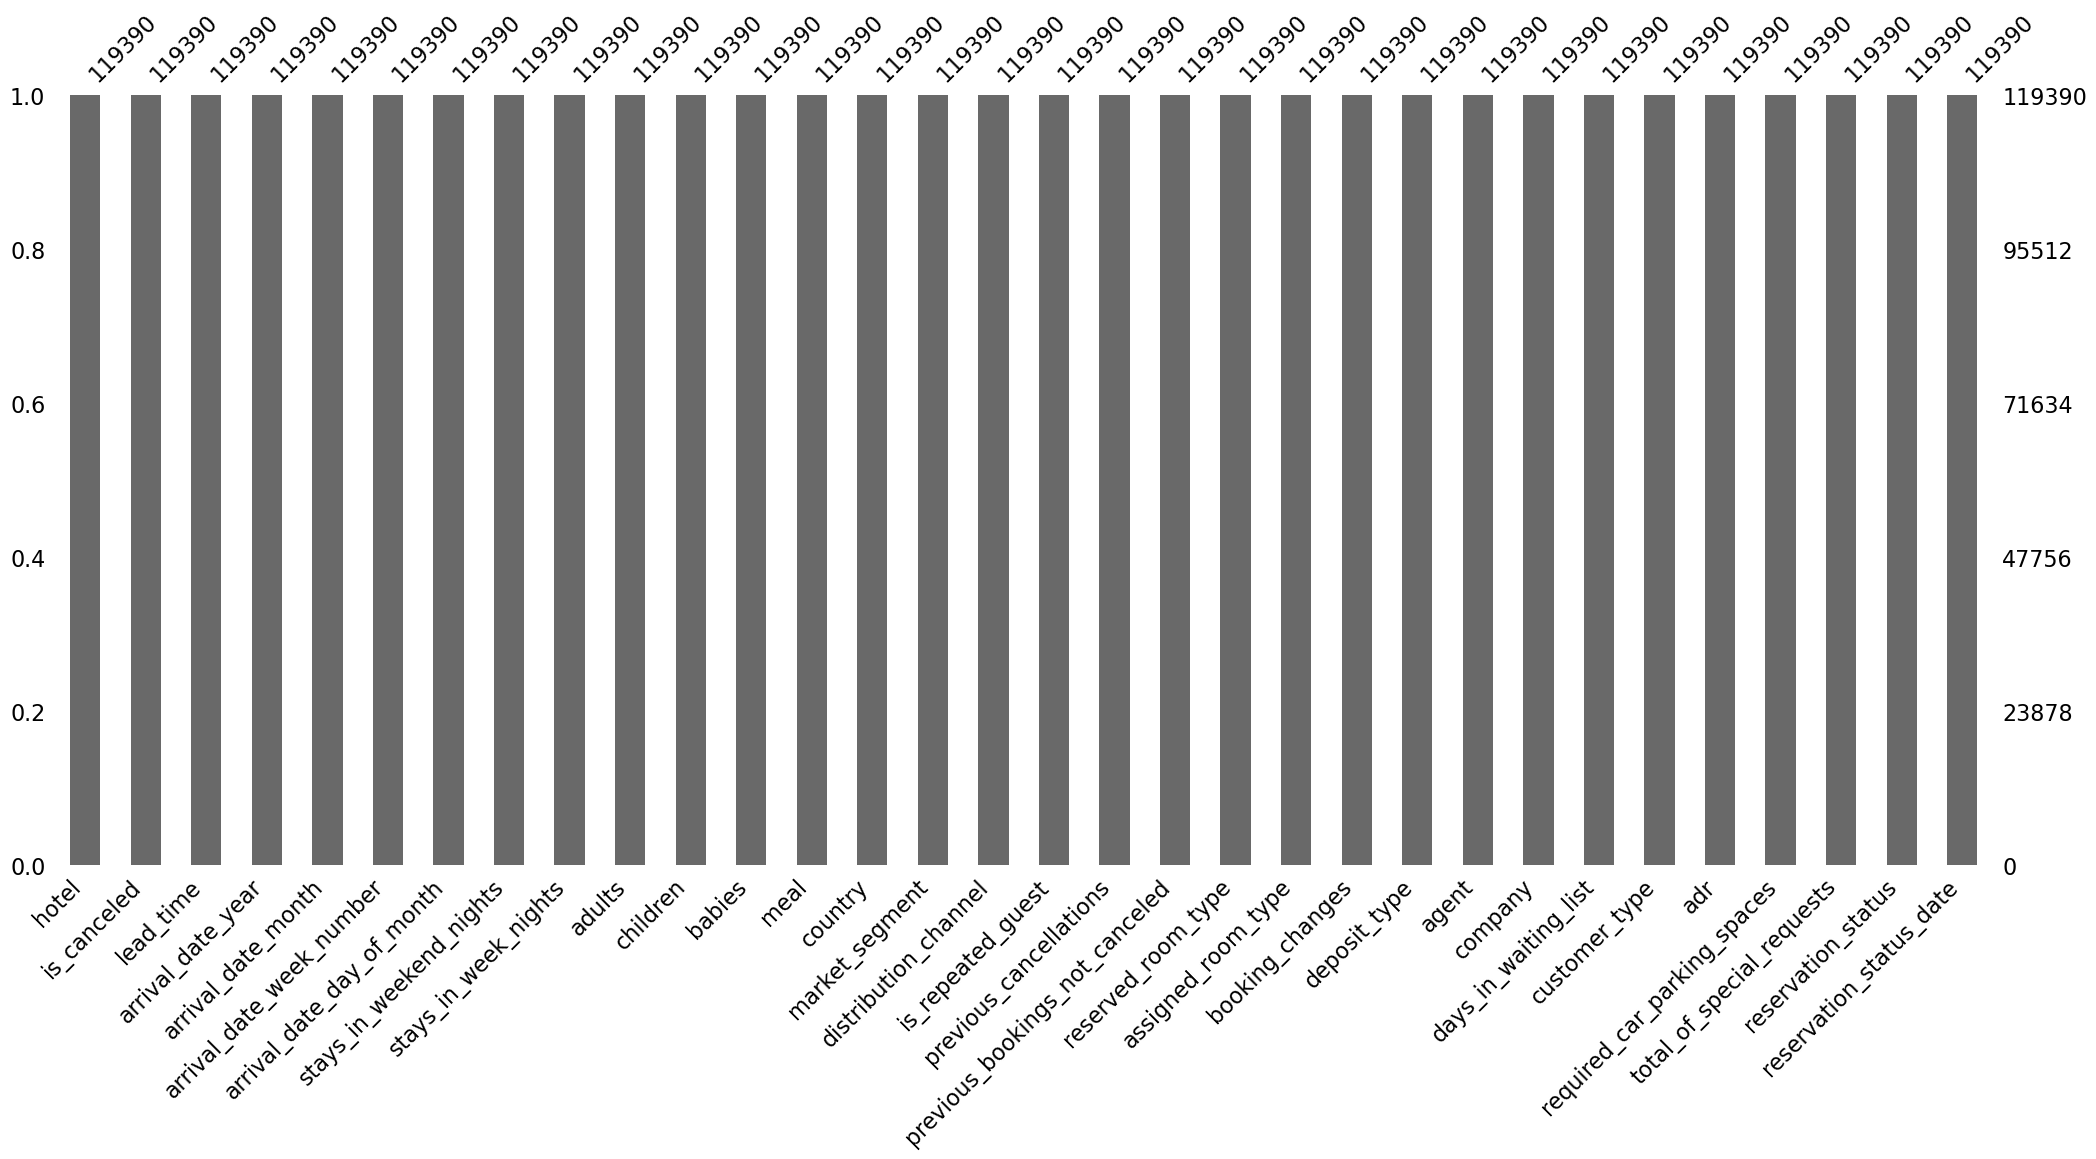

In [18]:
msno.bar(df)
plt.show()

# <b> adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

In [19]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [20]:
filter=(df['adults']==0) &( df['children']==0) & (df['babies']==0)
filter

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [21]:
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
2224                       3       0  ...    No Deposit    0.0   174.0   
2409                       0       0  ...    No Deposit    0.0   174.0   
3181                       2       0  ...    No Deposit   38.0     0.0   
3684                       4       0  ...    No Deposit  308.0     0.0   
3708                       4       0  ...    No Deposit  308.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
115029                     3       0  ...    No Deposit    7.0     0.0   
115091                     1       0  ...    No Deposit    0.0     0.0   
116251                     1       0  ...    No Deposit  425.0     0.0   
116534                     5       0  ...    No Deposit    9.0     0.0   
117087                     2       0  ...    No Deposit   52.0     0.0   

       days_in_waiting_list    customer_type     adr  \
2224                      0  Transient-Party    0.00   
2409                      0        Transient    0.00   
3181                      0  Transient-Party    0.00   
3684                    122  Transient-Party    0.00   
3708                    122  Transient-Party    0.00   
...                     ...              ...     ...   
115029                    0        Transient  100.80   
115091                    0        Transient    0.00   
116251                    0        Transient   73.80   
116534                    0  Transient-Party   22.86   
117087                    0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
2224                              0                          0   
2409                              0                          0   
3181                              0         

In [22]:
df=df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

<div style="background-color:#c472c5; padding:20px; border-radius:12px; border:1px solid #f5cba7; text-align:center;">

<h1 style="color:#030303;"> <b> 🧼 Exploratory Data Analysis (EDA)</h1>

</div>

In [23]:
#connect data to sql 
%load_ext sql 
con=sqlite3.connect('hotel.db')
cur=con.cursor()

%sql sqlite:///hotel.db
df.to_sql('hotel_booking',con,if_exists='replace',index=False,chunksize=30  )

119210

# <B> From where the most guests ar comming ?.


# sql

In [24]:
import prettytable
prettytable.DEFAULT='DEFAULT'

In [25]:
%sql select * from hotel_booking limit 10;

 * sqlite:///hotel.db
Done.


[('Resort Hotel', 0, 342, 2015, 'July', 27, 1, 0, 0, 2, 0.0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 'C', 3, 'No Deposit', 0.0, 0.0, 0, 'Transient', 0.0, 0, 0, 'Check-Out', '2015-07-01'),
 ('Resort Hotel', 0, 737, 2015, 'July', 27, 1, 0, 0, 2, 0.0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 'C', 4, 'No Deposit', 0.0, 0.0, 0, 'Transient', 0.0, 0, 0, 'Check-Out', '2015-07-01'),
 ('Resort Hotel', 0, 7, 2015, 'July', 27, 1, 0, 1, 1, 0.0, 0, 'BB', 'GBR', 'Direct', 'Direct', 0, 0, 0, 'A', 'C', 0, 'No Deposit', 0.0, 0.0, 0, 'Transient', 75.0, 0, 0, 'Check-Out', '2015-07-02'),
 ('Resort Hotel', 0, 13, 2015, 'July', 27, 1, 0, 1, 1, 0.0, 0, 'BB', 'GBR', 'Corporate', 'Corporate', 0, 0, 0, 'A', 'A', 0, 'No Deposit', 304.0, 0.0, 0, 'Transient', 75.0, 0, 0, 'Check-Out', '2015-07-02'),
 ('Resort Hotel', 0, 14, 2015, 'July', 27, 1, 0, 2, 2, 0.0, 0, 'BB', 'GBR', 'Online TA', 'TA/TO', 0, 0, 0, 'A', 'A', 0, 'No Deposit', 240.0, 0.0, 0, 'Transient', 98.0, 0, 1, 'Check-Out', '2015-07-03'),
 ('Resort Hotel', 0, 14, 2015, 'July', 27, 1, 0, 2, 2, 0.0, 0, 'BB', 'GBR', 'Online TA', 'TA/TO', 0, 0, 0, 'A', 'A', 0, 'No Deposit', 240.0, 0.0, 0, 'Transient', 98.0, 0, 1, 'Check-Out', '2015-07-03'),
 ('Resort Hotel', 0, 0, 2015, 'July', 27, 1, 0, 2, 2, 0.0, 0, 'BB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 'C', 0, 'No Deposit', 0.0, 0.0, 0, 'Transient', 107.0, 0, 0, 'Check-Out', '2015-07-03'),
 ('Resort Hotel', 0, 9, 2015, 'July', 27, 1, 0, 2, 2, 0.0, 0, 'FB', 'PRT', 'Direct', 'Direct', 0, 0, 0, 'C', 'C', 0, 'No Deposit', 303.0, 0.0, 0, 'Transient', 103.0, 0, 1, 'Check-Out', '2015-07-03'),
 ('Resort Hotel', 1, 85, 2015, 'July', 27, 1, 0, 3, 2, 0.0, 0, 'BB', 'PRT', 'Online TA', 'TA/TO', 0, 0, 0, 'A', 'A', 0, 'No Deposit', 240.0, 0.0, 0, 'Transient', 82.0, 0, 1, 'Canceled', '2015-05-06'),
 ('Resort Hotel', 1, 75, 2015, 'July', 27, 1, 0, 3, 2, 0.0, 0, 'HB', 'PRT', 'Offline TA/TO', 'TA/TO', 0, 0, 0, 'D', 'D', 0, 'No Deposit', 15.0, 0.0, 0, 'Transient', 105.5, 0, 0, 'Canceled', '2015-04-22')]

In [26]:
country_wise_guest=%sql select country,count(is_canceled) as Number_of_guests from hotel_booking where is_canceled==0 group by country order by count(is_canceled) desc;

 * sqlite:///hotel.db
Done.


In [27]:
country_wise_guest=pd.DataFrame(country_wise_guest)


In [28]:
country_wise_guest.head()

country  Number_of_guests
0     PRT             20977
1     GBR              9668
2     FRA              8468
3     ESP              6383
4     DEU              6067

# python

In [30]:
country_wise_guest_p=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_guest_p.columns=['Country','Number of Guests']
country_wise_guest_p

Country  Number of Guests
0       PRT             20977
1       GBR              9668
2       FRA              8468
3       ESP              6383
4       DEU              6067
..      ...               ...
161     BHR                 1
162     DJI                 1
163     MLI                 1
164     NPL                 1
165     FRO                 1

[166 rows x 2 columns]

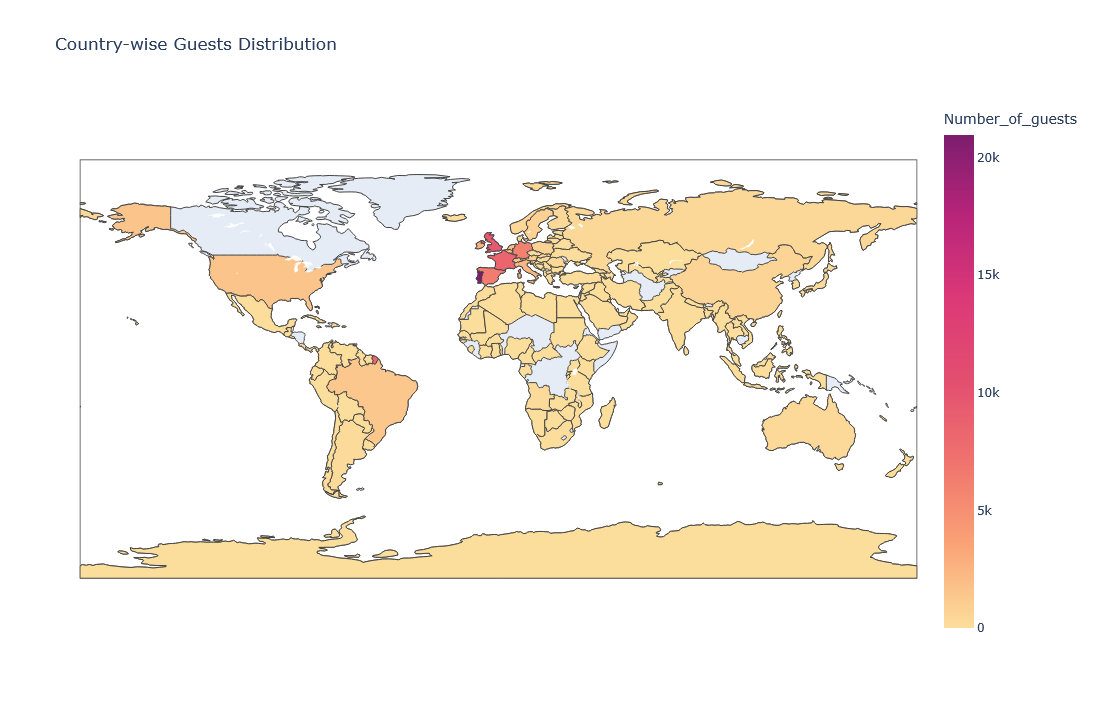

In [31]:
guests_map = px.choropleth(
    country_wise_guest,
    locations=country_wise_guest['country'],
    color=country_wise_guest['Number_of_guests'],
    hover_name=country_wise_guest['country'],
    color_continuous_scale='Turbo',  
    width=1200,
    height=700,
    title='Country-wise Guests Distribution'
)

guests_map = px.choropleth(
    country_wise_guest,
    locations=country_wise_guest['country'],
    color=country_wise_guest['Number_of_guests'],
    hover_name=country_wise_guest['country'],
    color_continuous_scale='Sunsetdark',  
    width=1200,
    height=700,
    title='Country-wise Guests Distribution'
)


guests_map.show()


## <b> People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

# 

# <B> How much do guests pay for a room per night?.

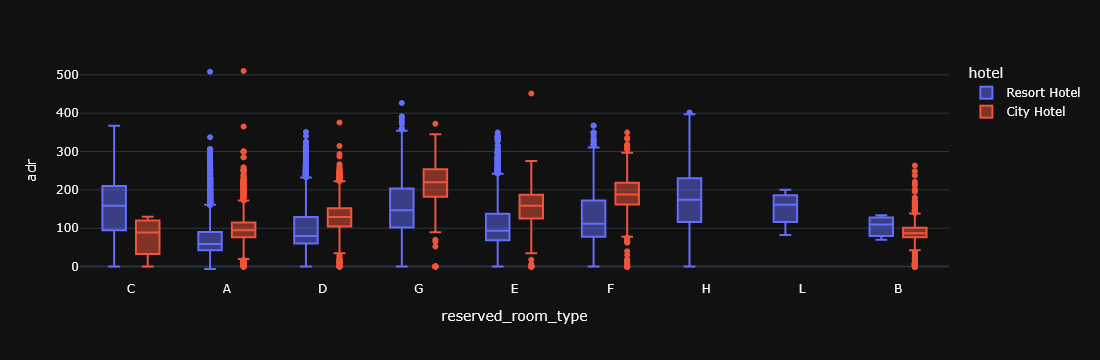

In [32]:
data=df[df['is_canceled']==0]

px.box(data_frame=data,x='reserved_room_type',y='adr',color='hotel',template='plotly_dark')

## <B> The figure shows that the average price per room depends on its type and the standard deviation.

# 

# <B> How does the price vary per night over the year?.

# sql 

In [33]:
resort=%sql select arrival_date_month as Month,avg(adr) as Adr from hotel_booking where is_canceled=0 and hotel='Resort Hotel' group by arrival_date_month order by Month asc;
resort=resort.DataFrame()

 * sqlite:///hotel.db
Done.


In [34]:
city=%sql select arrival_date_month as Month,avg(adr) as Adr from hotel_booking where is_canceled=0 and hotel='City Hotel' group by Month order by Month; 
city=city.DataFrame()

 * sqlite:///hotel.db
Done.


In [35]:
hotel=resort.merge(city,on='Month')
hotel.columns=['Month','Price_for_resort','Price_for_city']
hotel

Month  Price_for_resort  Price_for_city
0       April         75.867816      111.962267
1      August        181.205892      118.674598
2    December         68.410104       88.401855
3    February         54.147478       86.520062
4     January         48.761125       82.330983
5        July        150.122528      115.818019
6        June        107.974850      117.874360
7       March         57.056838       90.658533
8         May         76.657558      120.669827
9    November         48.706289       86.946592
10    October         61.775449      102.004672
11  September         96.416860      112.776582

In [36]:
import sort_dataframeby_monthorweek as sd 
def sort_month(df,column_name): 
    return sd.Sort_Dataframeby_Month(df,column_name)

In [37]:
hotel=sort_month(hotel,'Month')
hotel 

Month  Price_for_resort  Price_for_city
0     January         48.761125       82.330983
1    February         54.147478       86.520062
2       March         57.056838       90.658533
3       April         75.867816      111.962267
4         May         76.657558      120.669827
5        June        107.974850      117.874360
6        July        150.122528      115.818019
7      August        181.205892      118.674598
8   September         96.416860      112.776582
9     October         61.775449      102.004672
10   November         48.706289       86.946592
11   December         68.410104       88.401855

# python

In [38]:
resort_hotel=df[(df['is_canceled']==0)&(df['hotel']=='Resort Hotel')]
city_hotel=df[(df['is_canceled']==0)&(df['hotel']=='City Hotel')]

In [39]:
resort_hotel=resort_hotel.groupby(['arrival_date_month'],as_index=False).agg({'adr':'mean'})
city_hotel=city_hotel.groupby(['arrival_date_month'],as_index=False).agg({'adr':'mean'})

In [40]:
hotel=resort_hotel.merge(city_hotel,on='arrival_date_month')
hotel.columns=['Month','Price_for_resort','Price_for_city']
hotel

Month  Price_for_resort  Price_for_city
0       April         75.867816      111.962267
1      August        181.205892      118.674598
2    December         68.410104       88.401855
3    February         54.147478       86.520062
4     January         48.761125       82.330983
5        July        150.122528      115.818019
6        June        107.974850      117.874360
7       March         57.056838       90.658533
8         May         76.657558      120.669827
9    November         48.706289       86.946592
10    October         61.775449      102.004672
11  September         96.416860      112.776582

In [41]:
hotel=sort_month(hotel,'Month')
hotel

Month  Price_for_resort  Price_for_city
0     January         48.761125       82.330983
1    February         54.147478       86.520062
2       March         57.056838       90.658533
3       April         75.867816      111.962267
4         May         76.657558      120.669827
5        June        107.974850      117.874360
6        July        150.122528      115.818019
7      August        181.205892      118.674598
8   September         96.416860      112.776582
9     October         61.775449      102.004672
10   November         48.706289       86.946592
11   December         68.410104       88.401855

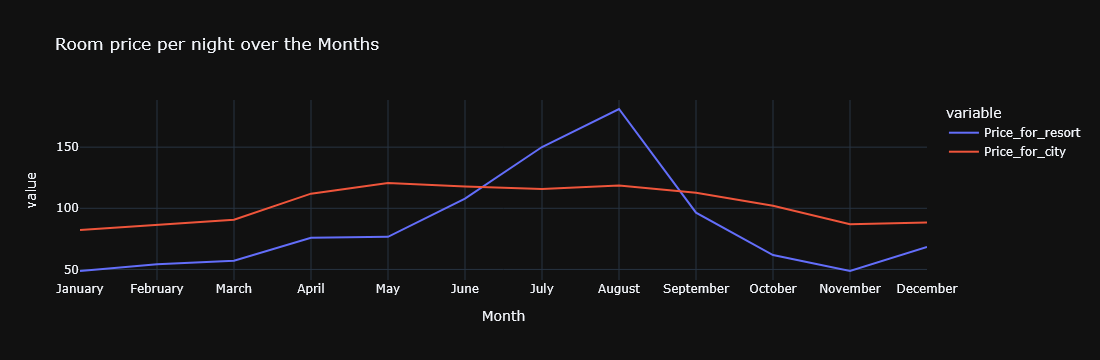

<Figure size 1800x1000 with 0 Axes>

In [42]:
plt.figure(figsize=(18,10))
px.line(hotel,x='Month',y=['Price_for_resort','Price_for_city'],
       title='Room price per night over the Months',template='plotly_dark')


## <B> This plot clearly indicates that prices at the Resort Hotel significantly increase during the summer season, while the prices of the City Hotel remain relatively stable, with the highest rates observed during spring and autumn.

# 

# <b> Which are the most busy months?.

# SQL

In [43]:
resort_guest=%sql select arrival_date_month as Month, count(*) Number_of_guests from hotel_booking where is_canceled=0 and hotel='Resort Hotel' group by Month;

 * sqlite:///hotel.db
Done.


In [44]:
city_guest=%sql select arrival_date_month as Month ,count(*) Number_of_guests from hotel_booking where is_canceled=0 and hotel='City Hotel' group by Month;

 * sqlite:///hotel.db
Done.


In [45]:
resort_guest=resort_guest.DataFrame()
city_guest=city_guest.DataFrame()
hotel_guests=resort_guest.merge(city_guest,on='Month')

In [46]:
hotel_guests.rename(columns={'Number_of_guests_x':'No_of_resort_guests','Number_of_guests_y':'No_of_city_guests'},inplace=True)
hotel_guests=sort_month(hotel_guests,'Month')
hotel_guests

Month  No_of_resort_guests  No_of_city_guests
0     January                 1866               2249
1    February                 2308               3051
2       March                 2571               4049
3       April                 2550               4010
4         May                 2535               4568
5        June                 2037               4358
6        July                 3137               4770
7      August                 3257               5367
8   September                 2102               4283
9     October                 2575               4326
10   November                 1975               2676
11   December                 2014               2377

In [47]:
resort_data=df[(df['is_canceled']==0)&(df['hotel']=='Resort Hotel')]
city_data=df[(df['is_canceled']==0)&(df['hotel']=='City Hotel')]

resort_guest_p=resort_data['arrival_date_month'].value_counts().reset_index() 
city_guest_p=city_data['arrival_date_month'].value_counts().reset_index()
hotel_guests_p=resort_guest_p.merge(city_guest_p,on='arrival_date_month')
hotel_guests_p=sort_month(hotel_guests_p,'arrival_date_month')
hotel_guests_p.rename(columns={'count_x':'No_of_resort_gusets','count_y':'No_of_city_guests'},inplace=True) 
hotel_guests_p

arrival_date_month  No_of_resort_gusets  No_of_city_guests
0             January                 1866               2249
1            February                 2308               3051
2               March                 2571               4049
3               April                 2550               4010
4                 May                 2535               4568
5                June                 2037               4358
6                July                 3137               4770
7              August                 3257               5367
8           September                 2102               4283
9             October                 2575               4326
10           November                 1975               2676
11           December                 2014               2377

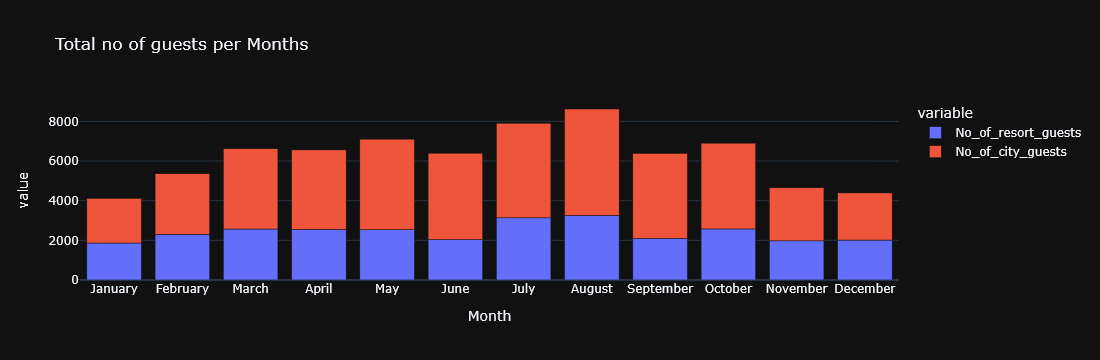

In [48]:
px.bar(hotel_guests,x='Month',y=['No_of_resort_guests','No_of_city_guests'],title="Total no of guests per Months",template='plotly_dark')

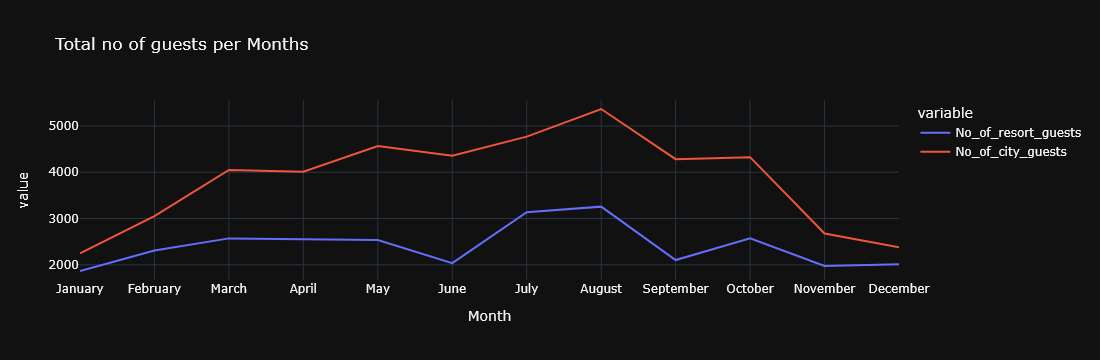

In [49]:
px.line(hotel_guests,x='Month',y=['No_of_resort_guests','No_of_city_guests'],title="Total no of guests per Months",template='plotly_dark')

## Red Line (City Hotel):

### Guest numbers rise steadily from January, peaking in August, then fall sharply in November and December.Highest number of guests: Around August (~5400 guests).Lowest number: In January and December.There is a clear increase during spring and autumn (March–May & September–October).


## Blue Line (Resort Hotel):

### Gradual rise from January, with a noticeable peak in July and August.Highest number of guests: Around August (~3300 guests).Drops again in September, with another slight rise in October, and very low again in December.Indicates popularity in summer months.

# 

# <B> How long do people stay at the hotels?.

# SQL

In [50]:
stay=%sql select (stays_in_week_nights+stays_in_weekend_nights) as total_nights,hotel,count(*) as Number_of_stays from hotel_booking where is_canceled=0 group by hotel,total_nights;

 * sqlite:///hotel.db
Done.


In [51]:
stay=pd.DataFrame(stay) 
stay

total_nights         hotel  Number_of_stays
0              0    City Hotel              251
1              1    City Hotel             9155
2              2    City Hotel            10983
3              3    City Hotel            11889
4              4    City Hotel             7694
..           ...           ...              ...
57            45  Resort Hotel                1
58            46  Resort Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

# python

In [52]:
data['total_nights']=data['stays_in_week_nights']+data['stays_in_weekend_nights']
stay=data.groupby(['total_nights','hotel'],as_index=False).count()
stay=stay.iloc[:,0:3]
stay.rename(columns={'is_canceled':'Number_of_stays'},inplace=True)
stay

total_nights         hotel  Number_of_stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

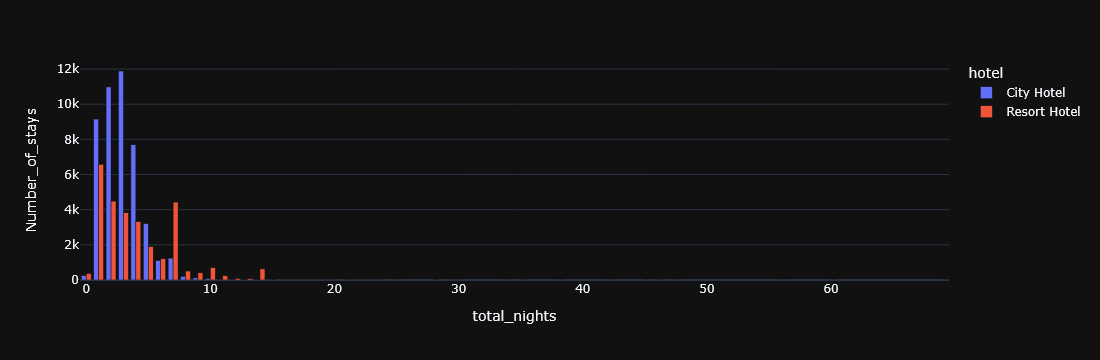

In [53]:
px.bar(data_frame=stay,x='total_nights',y='Number_of_stays',color='hotel',barmode='group',template='plotly_dark')

<div style="background-color:#c472c5; padding:20px; border-radius:12px; border:1px solid #f5cba7; text-align:center;">

<h1 style="color:#030303;"> <b> 🧼  Data Pre Processing</h1>

</div>

In [54]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

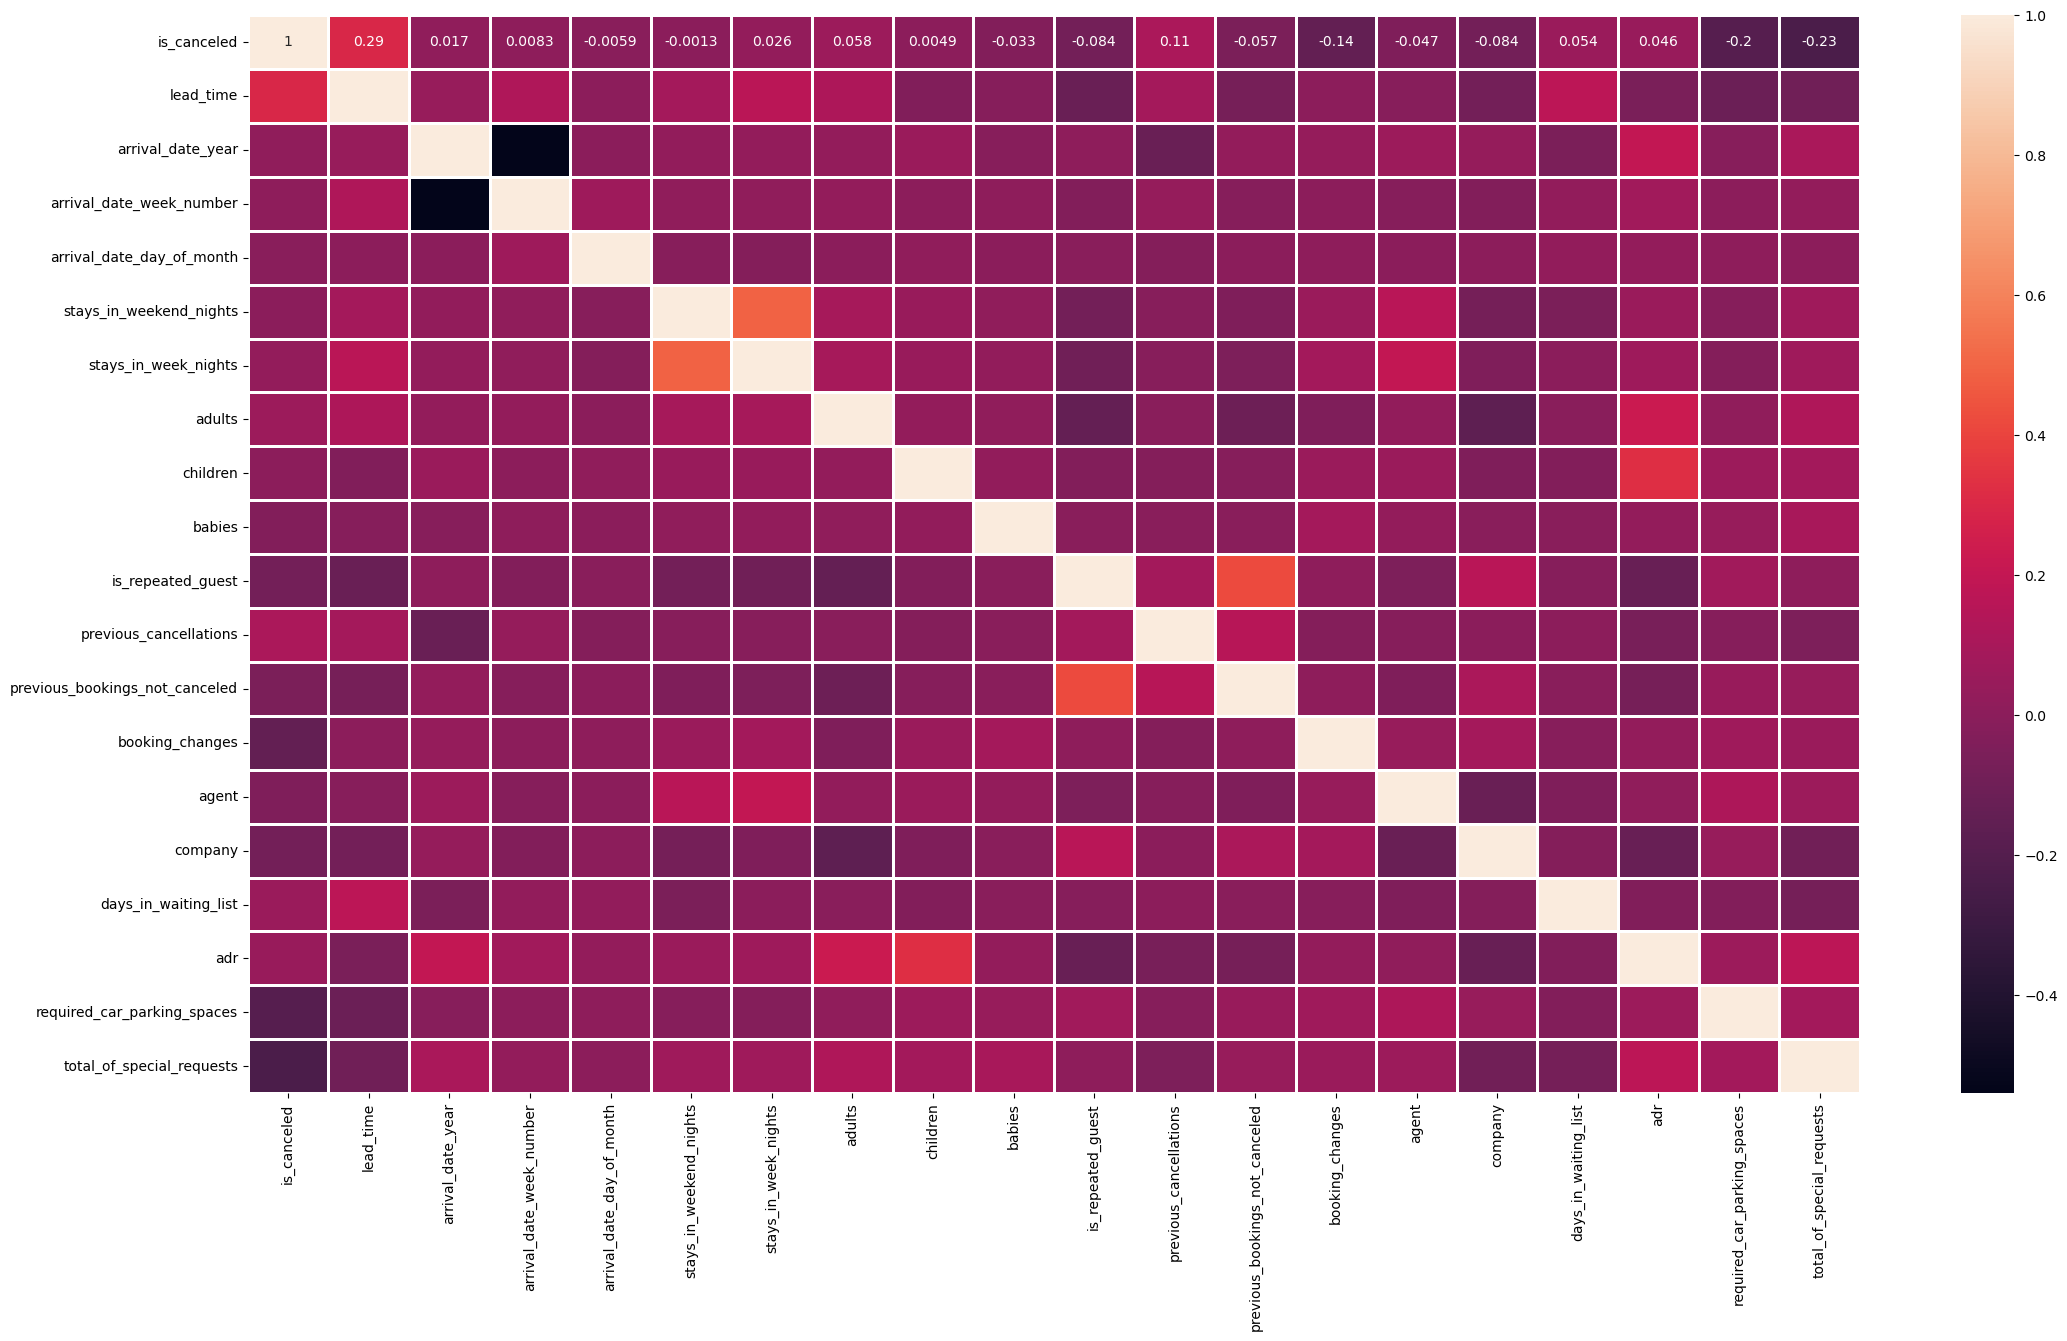

In [55]:
plt.figure(figsize=(26,14))
corr=df.select_dtypes(np.number).corr()
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [56]:
correlation=df.select_dtypes(np.number).corr()['is_canceled'].abs().sort_values(ascending=False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [57]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country']
df.drop(useless_col,axis=1,inplace=True)

In [58]:
df

hotel  is_canceled  lead_time arrival_date_month  \
0       Resort Hotel            0        342               July   
1       Resort Hotel            0        737               July   
2       Resort Hotel            0          7               July   
3       Resort Hotel            0         13               July   
4       Resort Hotel            0         14               July   
...              ...          ...        ...                ...   
119385    City Hotel            0         23             August   
119386    City Hotel            0        102             August   
119387    City Hotel            0         34             August   
119388    City Hotel            0        109             August   
119389    City Hotel            0        205             August   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                             0                     0       2       0.0  ...   
1                             0                     0       2       0.0  ...   
2                             0                     1       1       0.0  ...   
3                             0                     1       1       0.0  ...   
4                             0                     2       2       0.0  ...   
...                         ...                   ...     ...       ...  ...   
119385                        2                     5       2       0.0  ...   
119386                        2                     5       3       0.0  ...   
119387                        2                     5       2       0.0  ...   
119388                        2                     5       2       0.0  ...   
119389                        2                     7       2       0.0  ...   

        previous_bookings_not_canceled reserved_room_type deposit_type  agent  \
0                                    0                  C   No Deposit    0.0   
1                                    0                  C   No Deposit    0.0   
2                                    0                  A   No Deposit    0.0   
3                                    0                  A   No Deposit  304.0   
4                                    0                  A   No Deposit  240.0   
...                                ...                ...          ...    ...   
119385                               0                  A   No Deposit  394.0   
119386                               0                  E   No Deposit    9.0   
119387                               0                  D   No Deposit    9.0   
119388                               0                  A   No Deposit   89.0   
119389                               0                  A   No Deposit    9.0   

        company  customer_type     adr required_car_parking_spaces  \
0           0.0      Transient    0.00                           0   
1           0.0      Transient    0.00                           0   
2           0.0      Transient   75.00                           0   
3           0.0      Transient   75.00                           0   
4           0.0      Transient   98.00                           0   
...         ...            ...     ...                         ...   
119385      0.0      Transien

In [59]:
cal_cols=[col for col in df.columns if df[col].dtype=='O']
cal_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [60]:
cat_df=df[cal_cols]
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient              2015-07-01  
1                  C   No Deposit     Transient              2015-07-01  
2                  A   No Deposit     Transient              2015-07-02  
3                  A   No Deposit     Transient              2015-07-02  
4                  A   No Deposit     Transient              2015-07-03

In [61]:
cat_df['reservation_status_date']=pd.to_datetime(cat_df['reservation_status_date'])
cat_df['month']=cat_df['reservation_status_date'].dt.month
cat_df['day']=cat_df['reservation_status_date'].dt.day
cat_df['year']=cat_df['reservation_status_date'].dt.year

In [62]:
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  \
0                  C   No Deposit     Transient              2015-07-01   
1                  C   No Deposit     Transient              2015-07-01   
2                  A   No Deposit     Transient              2015-07-02   
3                  A   No Deposit     Transient              2015-07-02   
4                  A   No Deposit     Transient              2015-07-03   

   month  day  year  
0      7    1  2015  
1      7    1  2015  
2      7    2  2015  
3      7    2  2015  
4      7    3  2015

In [63]:
cat_df.drop('reservation_status_date',axis=1,inplace=True)
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type  month  day  year  
0                  C   No Deposit     Transient      7    1  2015  
1                  C   No Deposit     Transient      7    1  2015  
2                  A   No Deposit     Transient      7    2  2015  
3                  A   No Deposit     Transient      7    2  2015  
4                  A   No Deposit     Transient      7    3  2015

In [64]:
cat_df.drop('arrival_date_month',axis=1,inplace=True)

In [65]:
for i in cat_df.columns: 
    print(i)
    print(cat_df[i].unique())
    print()

hotel
['Resort Hotel' 'City Hotel']

meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type
['No Deposit' 'Refundable' 'Non Refund']

customer_type
['Transient' 'Contract' 'Transient-Party' 'Group']

month
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]

year
[2015 2014 2016 2017]



In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
cat_df['hotel']=le.fit_transform(cat_df['hotel'])
cat_df['meal']=le.fit_transform(cat_df['meal'])
cat_df['market_segment']=le.fit_transform(cat_df['market_segment'])
cat_df['distribution_channel']=le.fit_transform(cat_df['distribution_channel'])
cat_df['reserved_room_type']=le.fit_transform(cat_df['reserved_room_type'])
cat_df['deposit_type']=le.fit_transform(cat_df['deposit_type'])
cat_df['customer_type']=le.fit_transform(cat_df['customer_type'])

In [68]:
for i in cat_df.columns: 
    print(i)
    print(cat_df[i].unique())
    print()

hotel
[1 0]

meal
[0 1 2 3 4]

market_segment
[3 2 6 5 1 4 7 0]

distribution_channel
[1 0 3 4 2]

reserved_room_type
[2 0 3 4 6 5 7 8 1]

deposit_type
[0 2 1]

customer_type
[2 0 3 1]

month
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]

year
[2015 2014 2016 2017]



In [69]:
cat_df.head()

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0      1     0               3                     1                   2   
1      1     0               3                     1                   2   
2      1     0               3                     1                   0   
3      1     0               2                     0                   0   
4      1     0               6                     3                   0   

   deposit_type  customer_type  month  day  year  
0             0              2      7    1  2015  
1             0              2      7    1  2015  
2             0              2      7    2  2015  
3             0              2      7    2  2015  
4             0              2      7    3  2015

In [70]:
num_df=df.drop(cal_cols,axis=1)
num_df.drop('is_canceled',axis=1,inplace=True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
0                                    0    0.0      0.0    0.00   
1                                    0    0.0      0.0    0.00   
2                                    0    0.0      0.0   75.00   
3                                    0  304.0      0.0   75.00   
4                                    0  240.0      0.0   98.00   
...                                ...    ...      ...     ...   
119385                               0  394.0      0.0   96.14   
119386                               0    9.0      0.0  225.43   
119387                               0    9.0      0.0  157.71   
119388                               0   89.0      0.0  104.40   
119389                               0    9.0      0.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0       

In [71]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

In [72]:
num_df['lead_time']=np.log(num_df['lead_time']+1)
num_df['arrival_date_week_number']=np.log(num_df['arrival_date_week_number']+1)
num_df['arrival_date_day_of_month']=np.log(num_df['arrival_date_day_of_month']+1)
num_df['agent']=np.log(num_df['agent']+1)
num_df['company']=np.log(num_df['company']+1)
num_df['adr']=np.log(num_df['adr']+1)

In [73]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [74]:
num_df['adr']=num_df['adr'].fillna(value=num_df['adr'].mean())

In [75]:
num_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   5.837730                  3.332205                   0.693147   
1   6.603944                  3.332205                   0.693147   
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent  company       adr  required_car_parking_spaces  \
0  0.000000      0.0  0.000000                            0   
1  0.000000      0.0  0.000000                            0   
2  0.000000      0.0  4.330733                            0   
3  5.720312      0.0  4.330733                            0   
4  5.484797      0.0  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [76]:
cat_df.var()

hotel                    0.223085
meal                     1.138282
market_segment           1.602172
distribution_channel     0.822594
reserved_room_type       2.874866
deposit_type             0.112155
customer_type            0.333046
month                   11.194498
day                     77.068582
year                     0.511662
dtype: float64

In [77]:
x=pd.concat([cat_df,num_df],axis=1)
y=df['is_canceled']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [79]:
x_train.shape,y_test.shape

((83447, 26), (35763,))

<div style="background-color:#c472c5; padding:20px; border-radius:12px; border:1px solid #f5cba7; text-align:center;">

<h1 style="color:#030303;"> <b> 🧼 Model Building</h1>

</div>

In [80]:
def Distribution(y_test, y_pred):

    plt.style.use('dark_background') 

    plt.figure(figsize=(10, 6)) 

    sns.kdeplot(y_test, color='red', label='Actual Data Line', linewidth=2,shade=True)
    sns.kdeplot(y_pred, color='cyan', label='Predict Line', linewidth=2,shade=True)

    plt.title('Actual Data Line VS Predict Line', fontsize=14, fontweight='bold')
    plt.legend()
    plt.show()

In [81]:
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

def plotly_distribution(y_test, y_pred):
    # KDE calculation
    kde_test = gaussian_kde(y_test)
    kde_pred = gaussian_kde(y_pred)

    x_range = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x_range,
        y=kde_test(x_range),
        mode='lines',
        name='Actual Data Line',
        line=dict(color='red', width=3)
    ))

    fig.add_trace(go.Scatter(
        x=x_range,
        y=kde_pred(x_range),
        mode='lines',
        name='Predict Line',
        line=dict(color='cyan', width=3)
    ))

    # Layout styling with grid off
    fig.update_layout(
        title='Actual vs Predict Line',
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white'),
        xaxis=dict(title='Value', showgrid=False),
        yaxis=dict(title='Density', showgrid=False),
        legend=dict(x=0.7, y=0.95)
    )

    fig.show()

<div style="background-color:#fdf2e9; padding:5px; border-radius:8px; border:1px solid #f5cba7; text-align:center;">
<h1 style="color:#d35400;"> <b> 🧼 LinearRegression</h1>
</div>

In [82]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

print('R2_score =',lr.score(x_test,y_test))

R2_score = 0.325669003255887


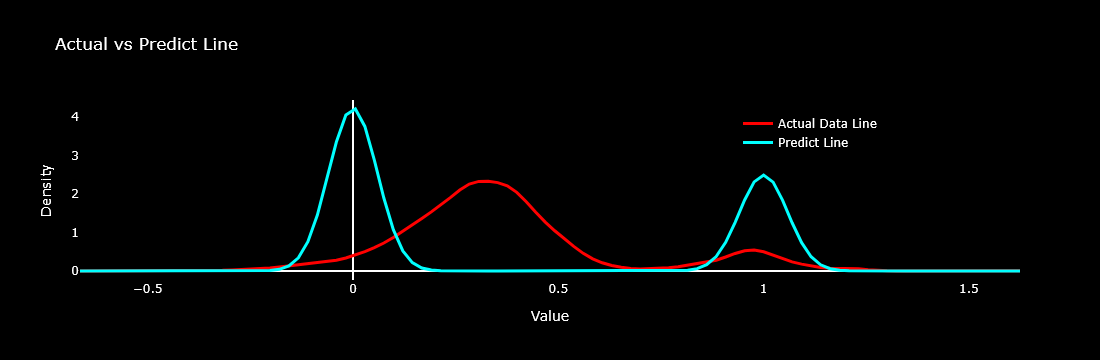

In [83]:
plotly_distribution(y_pred_lr,y_test)

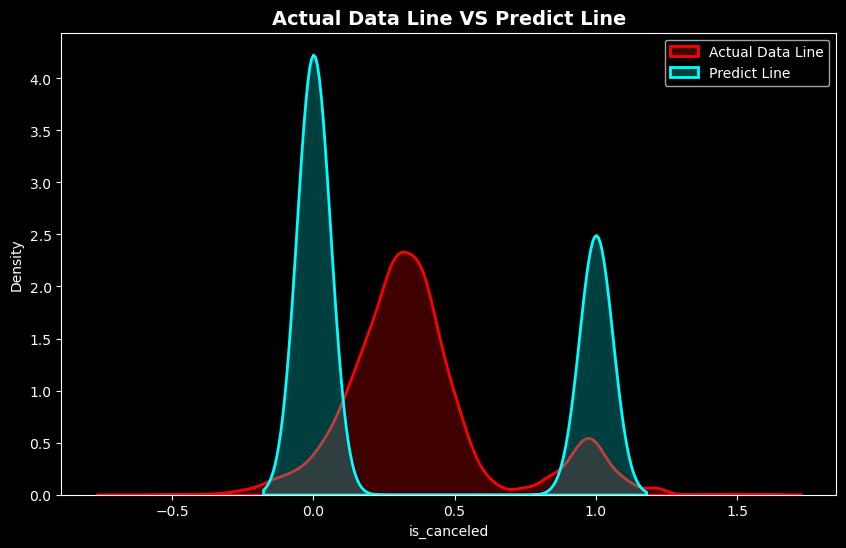

In [84]:
Distribution(y_pred_lr,y_test)

<div style="background-color:#fdf2e9; padding:5px; border-radius:8px; border:1px solid #f5cba7; text-align:center;">
<h1 style="color:#d35400;"> <b> 🧼Ridge Regression</h1>
</div>

In [85]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)

y_pred_rg=rg.predict(x_test)
print('R2_score= ',rg.score(x_test,y_test))

R2_score=  0.32566902825458877


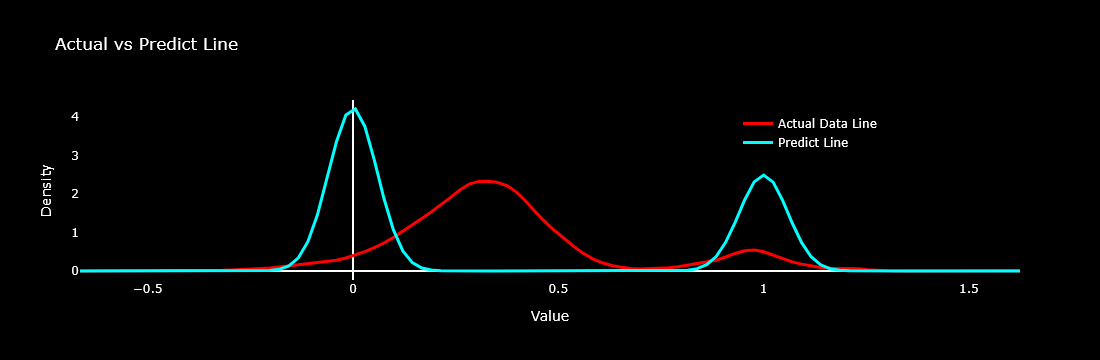

In [86]:
plotly_distribution(y_pred_rg,y_test)

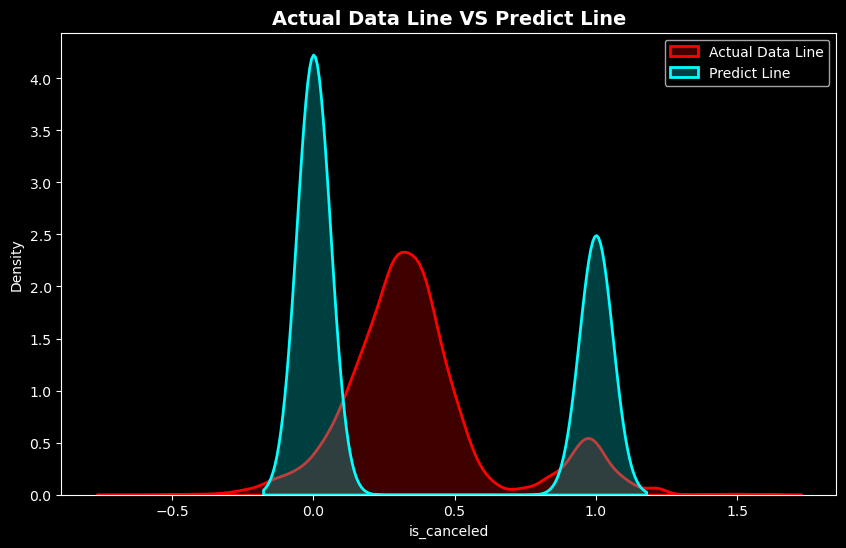

In [87]:
Distribution(y_pred_rg,y_test)

<div style="background-color:#fdf2e9; padding:5px; border-radius:8px; border:1px solid #f5cba7; text-align:center;">
<h1 style="color:#d35400;"> <b> 🧼LogisticRegression</h1>
</div>

In [88]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)
print('Accuracy Score of Logistic Regression is :',accuracy_score(y_test,y_pred_lg))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_lg))
print('Classification Report :\n',classification_report(y_test,y_pred_lg))

Accuracy Score of Logistic Regression is : 0.768531722730196
Confusion Matrix :
 [[19765  2731]
 [ 5547  7720]]
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.88      0.83     22496
           1       0.74      0.58      0.65     13267

    accuracy                           0.77     35763
   macro avg       0.76      0.73      0.74     35763
weighted avg       0.77      0.77      0.76     35763



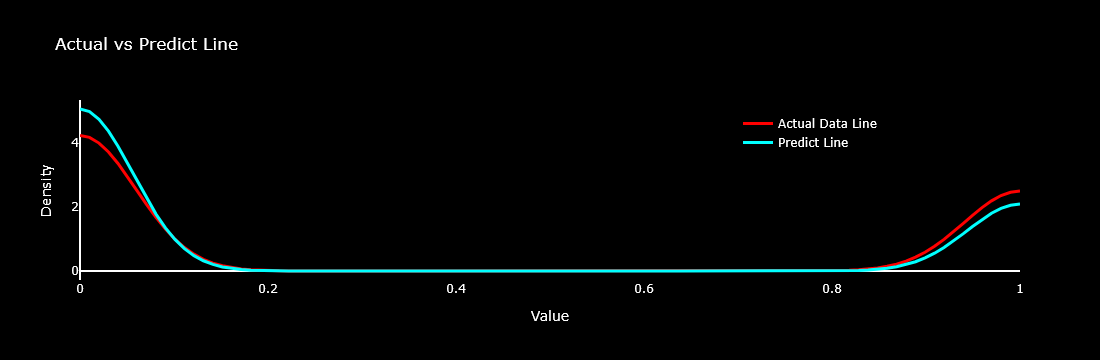

In [89]:
plotly_distribution(y_test,y_pred_lg)

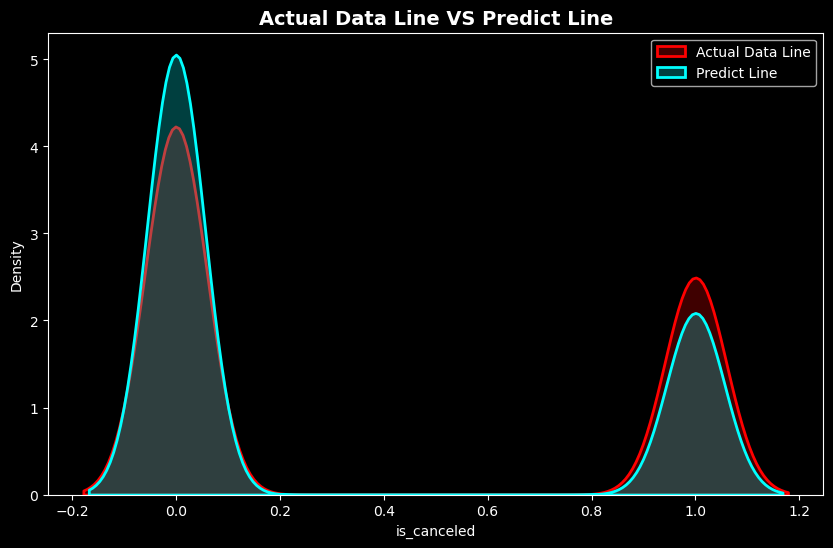

In [90]:
Distribution(y_test,y_pred_lg)

<div style="background-color:#fdf2e9; padding:5px; border-radius:8px; border:1px solid #f5cba7; text-align:center;">
<h1 style="color:#d35400;"> <b> 🧼KNN Regression</h1>
</div>

In [91]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

print('Accuracy Score of KNN is :',accuracy_score(y_test,y_pred_knn))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_knn))
print('Classification Report :\n',classification_report(y_test,y_pred_knn))

Accuracy Score of KNN is : 0.890529318010234
Confusion Matrix :
 [[21701   795]
 [ 3120 10147]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.96      0.92     22496
           1       0.93      0.76      0.84     13267

    accuracy                           0.89     35763
   macro avg       0.90      0.86      0.88     35763
weighted avg       0.89      0.89      0.89     35763



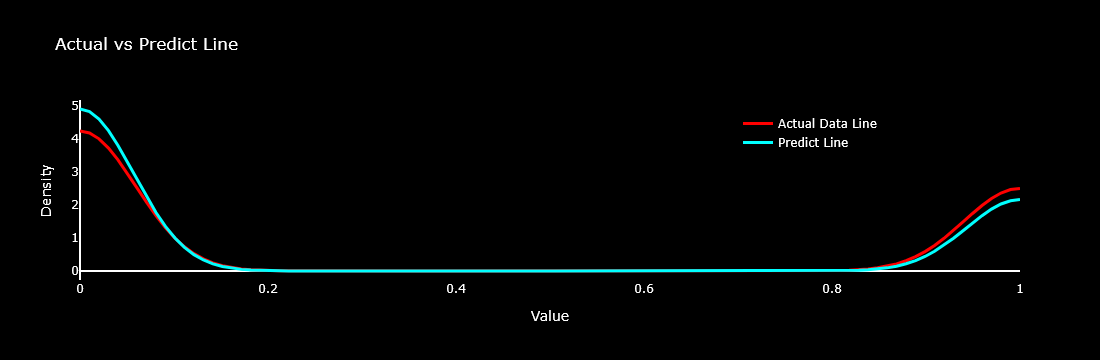

In [92]:
plotly_distribution(y_test,y_pred_knn)

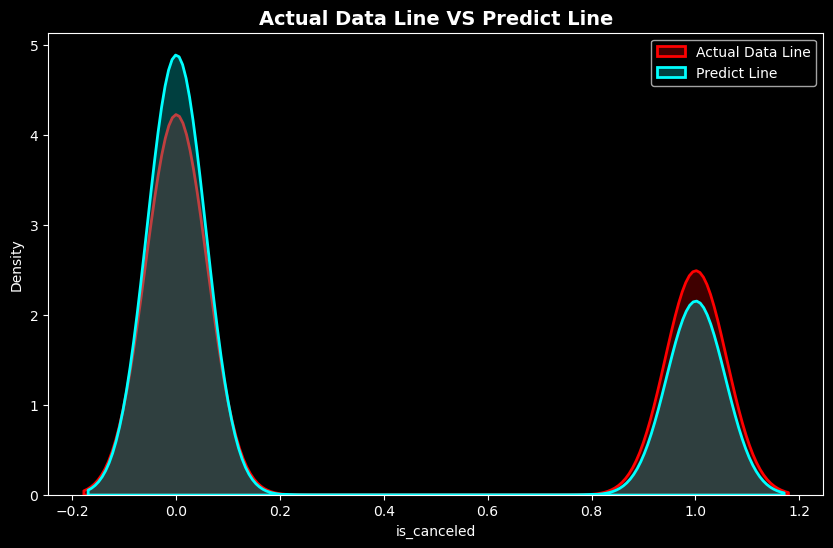

In [93]:
Distribution(y_test,y_pred_knn)

<div style="background-color:#fdf2e9; padding:5px; border-radius:8px; border:1px solid #f5cba7; text-align:center;">
<h1 style="color:#d35400;"> <b> 🧼Decision Tree Classifier </h1>
</div>

In [94]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

print(f"Accuracy Score of Decision Tree is : {accuracy_score(y_test,y_pred_dt)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred_dt)}")
print(f"Classification Report : \n{classification_report(y_test,y_pred_dt)}")

Accuracy Score of Decision Tree is : 0.9453625255151973
Confusion Matrix : 
[[21469  1027]
 [  927 12340]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22496
           1       0.92      0.93      0.93     13267

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



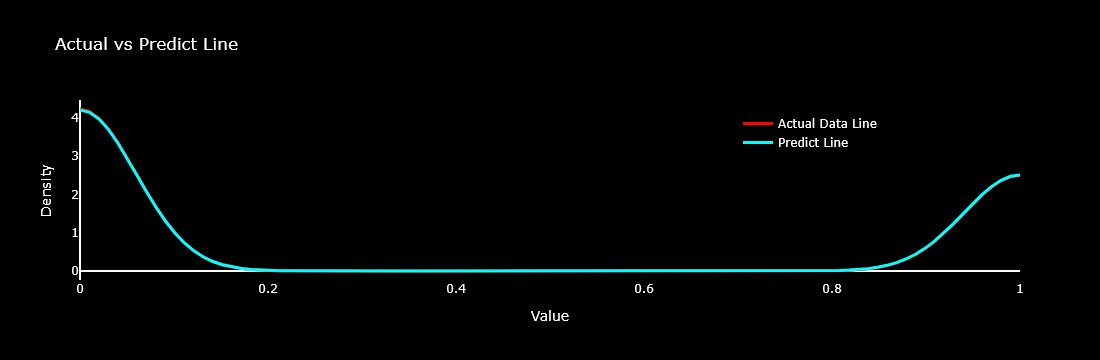

In [95]:
plotly_distribution(y_test,y_pred_dt)

In [96]:
Distribution(y_test,y_pred_dt)

<div style="background-color:#fdf2e9; padding:5px; border-radius:8px; border:1px solid #f5cba7; text-align:center;">
<h1 style="color:#d35400;"> <b> 🧼Random Forest Classifier </h1>
</div>

In [100]:
rd_clf=RandomForestClassifier()
rd_clf.fit(x_train,y_train)
y_pred_rd_clf=rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



Accuracy Score of Random Forest is : 0.9538629309621676
Confusion Matrix : 
[[22317   179]
 [ 1471 11796]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22496
           1       0.99      0.89      0.93     13267

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763



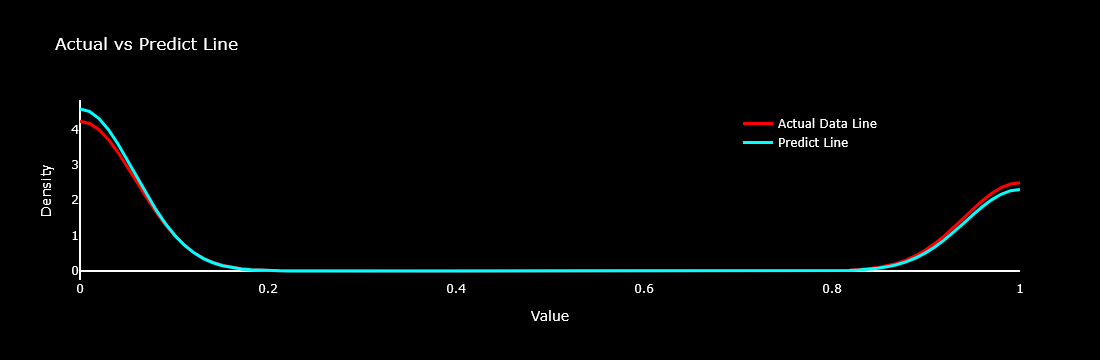

In [101]:
plotly_distribution(y_test,y_pred_rd_clf)

In [102]:
Distribution(y_test,y_pred_rd_clf)